In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

data = pd.read_csv('Breast_cancer_data.csv')
data.head()

,mean_radius,mean_texture,mean_perimeter,mean_area,mean_smoothness,diagnosis
0,17.99,10.38,122.80,1001.0,0.11840,0
1,20.57,17.77,132.90,1326.0,0.08474,0
2,19.69,21.25,130.00,1203.0,0.10960,0
3,11.42,20.38,77.58,386.1,0.14250,0
4,20.29,14.34,135.10,1297.0,0.10030,0


In [2]:
'''
1. Using logistic regression I would like to solve what are the most influential factors in determining if a person 
has breast cancer or not. Cancer has always been a detrimental disease that has been plaguing people for years. 
Especially considering the numerous variations there can be such as throat cancer, lung cancer, etc. While humans have 
had a hard time in determining the factors that can lead to certain cancers maybe the power of a machine can do a better 
job. Using this data that already has diagnosis based on whether a person has breast cancer or not as well as relevant 
data based on the suspicious lump found during an examination. This examination would prove whether the lump is cancerous 
and can possibly spread or is benign. Seeing as how the key answers in this data are either 0 or 1 classifying them as 
binary, I figured logistic regression would be the best choice to try and solve this as it is a classification algorithm.
'''

'\n1. Using logistic regression I would like to solve what are the most influential factors in determining if a person \nhas breast cancer or not. Cancer has always been a detrimental disease that has been plaguing people for years. \nEspecially considering the numerous variations there can be such as throat cancer, lung cancer, etc. While humans have \nhad a hard time in determining the factors that can lead to certain cancers maybe the power of a machine can do a better \njob. Using this data that already has diagnosis based on whether a person has breast cancer or not as well as relevant \ndata based on the suspicious lump found during an examination. This examination would prove whether the lump is cancerous \nand can possibly spread or is benign. Seeing as how the key answers in this data are either 0 or 1 classifying them as \nbinary, I figured logistic regression would be the best choice to try and solve this as it is a classification algorithm.\n'

In [3]:
# 2.

In [4]:
pd.options.mode.use_inf_as_na = True
# With this line of code any of the usual null values (e.g. None, NaN, -INF, INF) will be treated as NA making it easier to replace

In [5]:
data.fillna(1)
data.columns[data.isnull().any()]
print(data.isnull().values.any())
'''
In case there are any null values in the data I want to immediatley replace them with 1s so that they will not cause any
errors once I start working with the data. I then use this method I found that checks to see if there are any null values
to be found in the columns. This shows that none of the columns have any null values meaning there shouldn't be any errors
once I start working
'''
data = data.astype("float")
data.dtypes

False


mean_radius        float64
mean_texture       float64
mean_perimeter     float64
mean_area          float64
mean_smoothness    float64
diagnosis          float64
dtype: object

In [6]:
data.describe()

,mean_radius,mean_texture,mean_perimeter,mean_area,mean_smoothness,diagnosis
count,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,14.127292,19.289649,91.969033,654.889104,0.096360,0.627417
std,3.524049,4.301036,24.298981,351.914129,0.014064,0.483918
min,6.981000,9.710000,43.790000,143.500000,0.052630,0.000000
25%,11.700000,16.170000,75.170000,420.300000,0.086370,0.000000
50%,13.370000,18.840000,86.240000,551.100000,0.095870,1.000000
75%,15.780000,21.800000,104.100000,782.700000,0.105300,1.000000
max,28.110000,39.280000,188.500000,2501.000000,0.163400,1.000000


In [7]:
data.corr()

,mean_radius,mean_texture,mean_perimeter,mean_area,mean_smoothness,diagnosis
mean_radius,1.000000,0.323782,0.997855,0.987357,0.170581,-0.730029
mean_texture,0.323782,1.000000,0.329533,0.321086,-0.023389,-0.415185
mean_perimeter,0.997855,0.329533,1.000000,0.986507,0.207278,-0.742636
mean_area,0.987357,0.321086,0.986507,1.000000,0.177028,-0.708984
mean_smoothness,0.170581,-0.023389,0.207278,0.177028,1.000000,-0.358560
diagnosis,-0.730029,-0.415185,-0.742636,-0.708984,-0.358560,1.000000


In [8]:

'''
From this group by code we can see that all of the 569 patients have a clear diagnosis of either 0 or 1 making this 
the perfect data to use on a classification algorithm like logisitic regression
'''
data.groupby('diagnosis').count()

,mean_radius,mean_texture,mean_perimeter,mean_area,mean_smoothness
diagnosis,,,,,
0.0,212,212,212,212,212
1.0,357,357,357,357,357


C:\Users\petert6\Anaconda3\lib\site-packages\statsmodels\nonparametric\kde.py:487: RuntimeWarning: invalid value encountered in true_divide
  binned = fast_linbin(X, a, b, gridsize) / (delta * nobs)
C:\Users\petert6\Anaconda3\lib\site-packages\statsmodels\nonparametric\kdetools.py:34: RuntimeWarning: invalid value encountered in double_scalars
  FAC1 = 2*(np.pi*bw/RANGE)**2
C:\Users\petert6\Anaconda3\lib\site-packages\statsmodels\nonparametric\kde.py:487: RuntimeWarning: invalid value encountered in true_divide
  binned = fast_linbin(X, a, b, gridsize) / (delta * nobs)
C:\Users\petert6\Anaconda3\lib\site-packages\statsmodels\nonparametric\kdetools.py:34: RuntimeWarning: invalid value encountered in double_scalars
  FAC1 = 2*(np.pi*bw/RANGE)**2


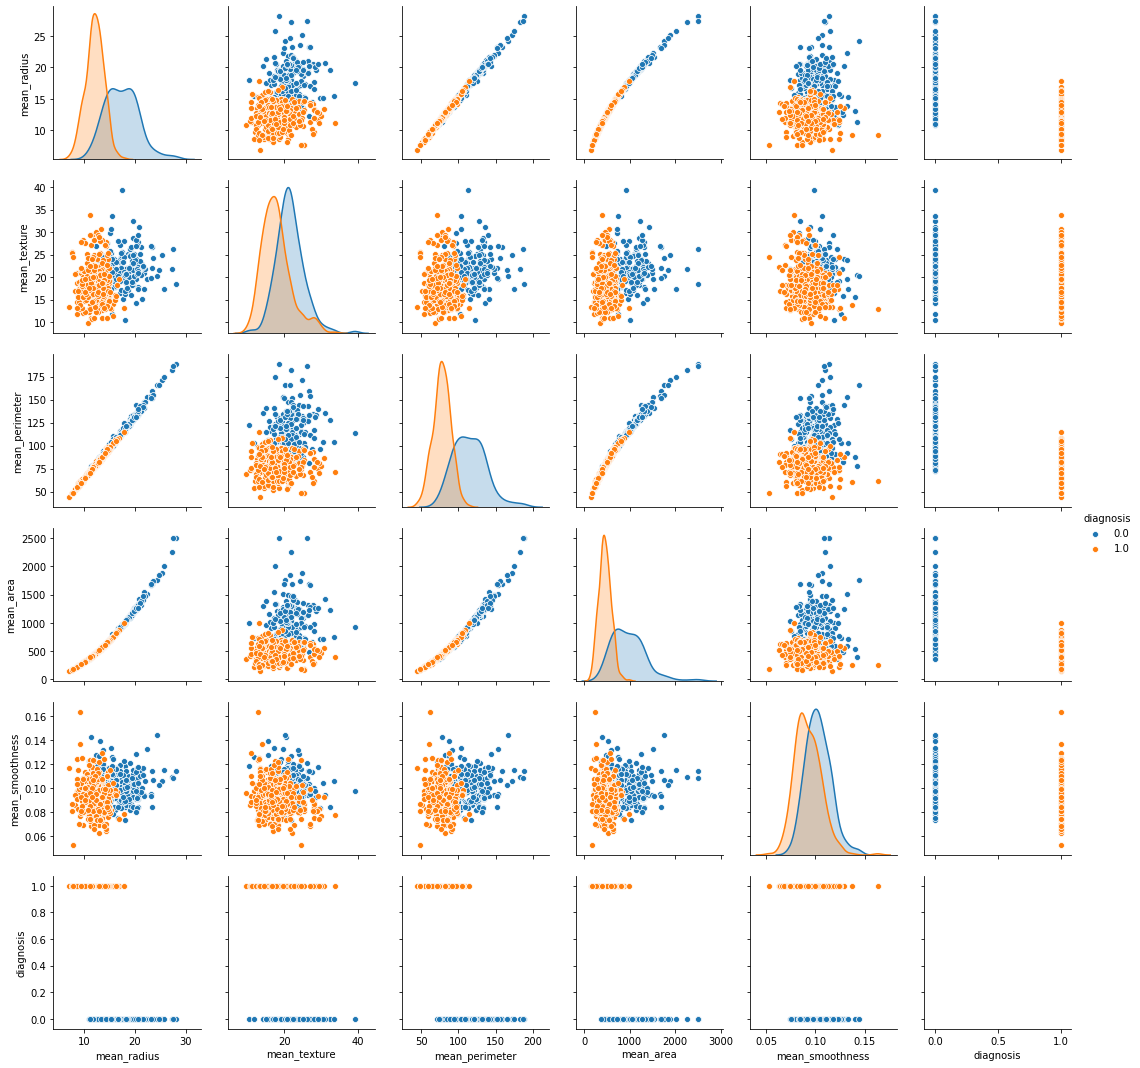

In [9]:
sns.pairplot(data, hue='diagnosis', diag_kind='kde');

In [10]:
# 3.   
# https://towardsdatascience.com/building-a-logistic-regression-in-python-301d27367c24
# https://www.geeksforgeeks.org/how-to-implement-a-gradient-descent-in-python-to-find-a-local-minimum/
# https://github.com/Arko98/Gradient-Descent-Algorithms

In [11]:
def sigmoid(x,w,bias):
    return 1/(1+np.exp(-(w*x+bias)))

def lr_hypothesis(x,theta):
    return np.dot(x,theta)

def cost(weights,x,y,bias):
    m,n = x.shape
    loss = 0
    for i in range(m):
        loss += -(y[i]*np.log(sigmoid(x[i],weights,bias)))
        
    return loss/m

def Hypothesis(theta, x):   
    return 1/(1+np.exp(-1*np.dot(x,theta)))

def Accuracy(theta,X,y):
    correct = 0
    length = len(X)
    prediction = (Hypothesis(theta, X) > 0.5)
    _y = y.reshape(-1, 1)
    correct = prediction == _y
    my_accuracy = (np.sum(correct) / length)*100
    print ('Accuracy %:', my_accuracy)


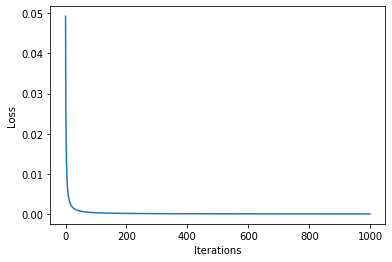

Accuracy %: 63.1578947368421


In [12]:
# Gradient descent
# This will give us all the column values except for the last one which will be the dependent variable for this
X = data.iloc[:, :-1].values

# This will make it so that y only contains the dependent variable values which is what we want to classify
y = data.iloc[:, -1].values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, stratify = y,random_state=1234)

m,n = X_train.shape

z = np.ones(m)
z = z.reshape(m,1)

X_train = np.append(z,X_train,axis=1)


m,n = X_train.shape
weights = np.zeros(n)
weights = weights.reshape(n,1)
y_train = y_train.reshape(-1,1)




iterations = 1000

def gradientDescent(x,y,weights,iterations):
    m,n = x.shape
    # A set value of the bias and learning rate is initiated here in order to set up the components for the equations
    bias = 0.01
    learning_rate = 0.001
    
    
    d_weight = 0
    d_bias = 0
    loss_list = []
    for i in range(iterations):
        '''
        Despite vectorization bein an option for performing these calculations I kept getting unnatural values from the
        results. So I instead used a loop to have the process done step by step and focused on making sure
        each element worked how it should.
        '''
        for j in range(m):
            
        
            d_weight += np.sum((-y[j])*(1-sigmoid(x[j],weights,bias))*x[j])
            d_bias += np.sum((-y[j])*(1-sigmoid(x[j],weights,bias)))
            
            if(j % 10 == 0):
                weights = weights - (learning_rate * d_weight)
                bias = bias - (learning_rate * d_bias)
                d_weight = 0
                d_bias = 0
            
        
        gr_cost = cost(weights,x,y,bias)[0]
        
        #print(gr_cost[0])
        loss_list.append(gr_cost[0])
        
    it = [i for i in range(iterations)]
    plt.xlabel('Iterations')
    plt.ylabel('Loss')
    plt.plot(it,loss_list)
    plt.show()
        
    return weights
weights = gradientDescent(X_train,y_train,weights,iterations)
m,n = X_test.shape

z = np.ones(m)
z = z.reshape(m,1)
X_test = np.append(z,X_test,axis=1)
y_test = y_test.reshape(-1,1)


Accuracy(weights,X_test,y_test)

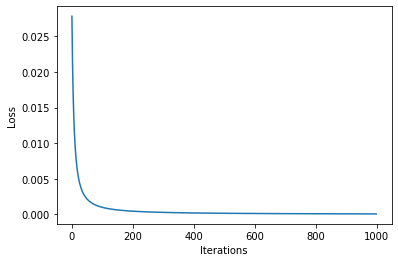

Accuracy %: 63.1578947368421


In [13]:
# Stochastic gradient descent
# https://realpython.com/gradient-descent-algorithm-python/
# https://www.youtube.com/watch?v=8lJ6IU028k8



iterations = 1000

def stochasticGradientDescent(x,y,weights,iterations):
    m,n = x.shape
    bias = 0.01
    learning_rate = 0.001
    d_weight = 0
    d_bias = 0
    points = 0
    loss_list = []
    for i in range(iterations):
        indexArray = list(range(m))
        j = 0
        while j < m:
            '''
            From the readings Stochastic Gradient Descent goes through each element of the data but takes one at random
            instead of in order while getting rid of the element and focusing on a better local minima
            '''
            random = int(np.random.uniform(0, indexArray.__len__()))
            x_row = x[indexArray[random]]
            x_row = x_row.reshape(x_row.shape[0],1)
        
            
            d_weight += np.sum((-y[j])*(1-sigmoid(x_row,weights,bias))*x_row)
            d_bias += np.sum((-y[j])*(1-sigmoid(x_row,weights,bias)))
            
            
            if(j%10 == 0):
                weights = weights - (learning_rate * d_weight)
                bias = bias - (learning_rate * d_bias)
                d_weight = 0
                d_bias = 0
                
            del(indexArray[random])
            j+=1
        gr_cost = cost(weights,x,y,bias)[0]
        loss_list.append(gr_cost[0])
        
    it = [i for i in range(iterations)]
    plt.xlabel('Iterations')
    plt.ylabel('Loss')
    plt.plot(it,loss_list)
    plt.show()
    return weights
weights = stochasticGradientDescent(X_train,y_train,weights,iterations)

Accuracy(weights,X_test,y_test)

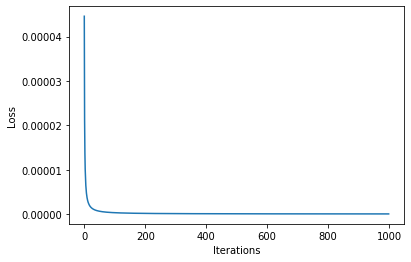

Accuracy %: 63.1578947368421


In [14]:
# 4
# https://www.analyticsvidhya.com/blog/2021/06/guide-to-gradient-descent-and-its-variants-with-python-implementation/#h2_7
# https://medium.com/hackernoon/implementing-different-variants-of-gradient-descent-optimization-algorithm-in-python-using-numpy-809e7ab3bab4
# https://realpython.com/gradient-descent-algorithm-python/#momentum-in-stochastic-gradient-descent

# Stochastic gradient descent with momentum



iterations = 1000

def stochasticGradientDescent(x,y,weights,iterations):
    m,n = x.shape
    bias = 0.01
    learning_rate = 0.001
    d_weight = 0
    d_bias = 0
    points = 0
    loss_list = []
    old_weights = 1
    old_bias = 1
    for i in range(iterations):
        indexArray = list(range(m))
        j = 0
        while j < m:
            random = int(np.random.uniform(0, indexArray.__len__()))
            x_row = x[indexArray[random]]
            x_row = x_row.reshape(x_row.shape[0],1)
        
            
            d_weight += np.sum((-y[j])*(1-sigmoid(x_row,weights,bias))*x_row)
            d_bias += np.sum((-y[j])*(1-sigmoid(x_row,weights,bias)))
            
            
            
            if(j%10 == 0):
                '''
                For momentum we are using the same process as SGD but once it is time for an update
                the added effect of an eta (in this case 0.9) is combined with the weight and bias updating
                in order to get values that are more likely to be decreasing the loss values
                '''
                new_weights = (learning_rate*old_weights) + (0.9*d_weight)
                new_bias = (learning_rate*old_bias) + (0.9*d_bias)
                weights = weights - new_weights
                bias = bias - new_bias
                old_weights = new_weights
                old_bias = new_bias
                d_weight = 0
                d_bias = 0
        
            del(indexArray[random])
            j+=1
        gr_cost = cost(weights,x,y,bias)[0]
        #print(gr_cost[0])
        loss_list.append(gr_cost[0])
        
    it = [i for i in range(iterations)]
    plt.xlabel('Iterations')
    plt.ylabel('Loss')
    plt.plot(it,loss_list)
    plt.show()
    return weights
weights = stochasticGradientDescent(X_train,y_train,weights,iterations)

Accuracy(weights,X_test,y_test)

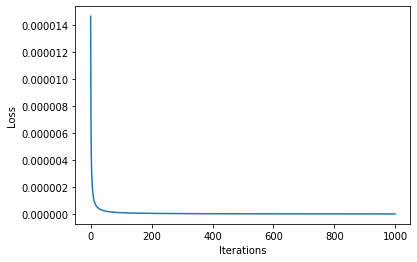

Accuracy %: 63.1578947368421


In [15]:
# Stochastic gradient descent with nesterov
# https://github.com/yacineMahdid/artificial-intelligence-and-machine-learning/blob/master/deep-learning-from-scratch-python/Gradient%20Descent%20Optimization%20Algorithms.ipynb




iterations = 1000

def stochasticGradientDescent(x,y,weights,iterations):
    m,n = x.shape
    bias = 0.01
    learning_rate = 0.001
    d_weight = 0
    d_bias = 0
    points = 0
    loss_list = []
    old_weights = 1
    old_bias = 1
    weights_ahead = weights - (learning_rate * old_weights)
    bias_ahead = bias - (learning_rate * old_bias)
    for i in range(iterations):
        indexArray = list(range(m))
        j = 0
        while j < m:
            random = int(np.random.uniform(0, indexArray.__len__()))
            x_row = x[indexArray[random]]
            x_row = x_row.reshape(x_row.shape[0],1)
            
            d_weight += np.sum((-y[j])*(1-sigmoid(x_row,weights_ahead,bias_ahead))*x_row)
            d_bias += np.sum((-y[j])*(1-sigmoid(x_row,weights_ahead,bias_ahead)))
            
            
            if(j%10 == 0):
                '''
                With Nesterov we are doing the same process as with momentum only we are again adding other values to
                the equation to make the process "smarter". This is done by giving an approximation of what the next 
                position would be and how it would affect the current development of the algorithm
                '''
                new_weights = (learning_rate*old_weights) + (0.9*d_weight)
                new_bias = (learning_rate*old_bias) + (0.9*d_bias)
                weights = weights - new_weights
                bias = bias - new_bias
                old_weights = new_weights
                old_bias = new_bias
                
                # Here we add the additional nesterov components to the momentum 
                weights_ahead = weights - (learning_rate*old_weights)
                bias_ahead = bias - (learning_rate*old_bias)
                d_weight = 0
                d_bias = 0
            
            del(indexArray[random])
            j+=1
        gr_cost = cost(weights,x,y,bias)[0]
        #print(gr_cost[0])
        loss_list.append(gr_cost[0])
        
    it = [i for i in range(iterations)]
    plt.xlabel('Iterations')
    plt.ylabel('Loss')
    plt.plot(it,loss_list)
    plt.show()
    return weights
weights = stochasticGradientDescent(X_train,y_train,weights,iterations)

Accuracy(weights,X_test,y_test)

In [16]:
'''
Based on these results both the momentum and nesterov algorithm seem to display the same behavior but seeing each of their 
loss values shows that the nesterov algorithm has a consistently lower value than the momentum algorithm. This would make 
sense as from the papers, nesterov seems to build off of and improve the momentum algorithm.

In comparison to the previous gradient descent algorithms both of the optimization algorithms seem to do their job
of improving on gradient descent. While the resulting graphs all appear to be the same the loss values are actually
decreasing which is a good sign for ML problems, showing that the difference between the predicted and targeted values
is decreasing making the algorithm more likely to have a more accurate prediction. And seeing as how the loss value 
decreases more after the addition of the optimization algorithms, it shows just how advantageous a successful 
implementation of these algorithms can be.
'''

'\nBased on these results both the momentum and nesterov algorithm seem to display the same behavior but seeing each of their \nloss values shows that the nesterov algorithm has a consistently lower value than the momentum algorithm. This would make \nsense as from the papers, nesterov seems to build off of and improve the momentum algorithm.\n\nIn comparison to the previous gradient descent algorithms both of the optimization algorithms seem to do their job\nof improving on gradient descent. While the resulting graphs all appear to be the same the loss values are actually\ndecreasing which is a good sign for ML problems, showing that the difference between the predicted and targeted values\nis decreasing making the algorithm more likely to have a more accurate prediction. And seeing as how the loss value \ndecreases more after the addition of the optimization algorithms, it shows just how advantageous a successful \nimplementation of these algorithms can be.\n'